In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [34]:
X, y = make_moons(100, noise=0.25,random_state=2)

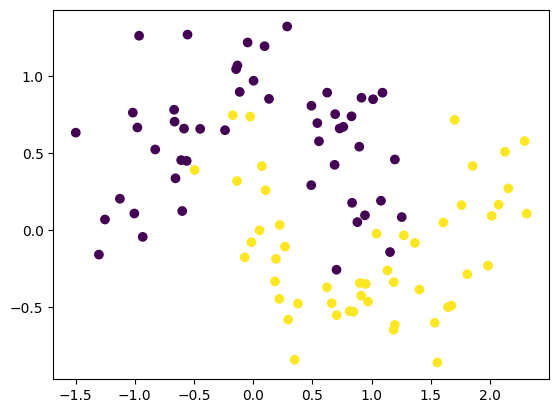

In [35]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [36]:
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=2,kernel_initializer="he_normal",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(Dense(10,activation="relu",kernel_initializer="he_normal",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(Dense(10,activation="relu",kernel_initializer="he_normal",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(Dense(10,activation="relu",kernel_initializer="he_normal",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
initial_weights = model.get_weights()

>→ Means “random numbers from a normal (Gaussian) distribution with mean = 0 and standard >deviation = 1”.
>In short: it gives standard normal random 

In [38]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [39]:
model.set_weights(initial_weights)

In [40]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
history = model.fit(X,y,epochs=500,validation_split=0.2)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5375 - loss: 0.7733 - val_accuracy: 0.3500 - val_loss: 0.7745
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5375 - loss: 0.7714 - val_accuracy: 0.3500 - val_loss: 0.7732
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5375 - loss: 0.7697 - val_accuracy: 0.3500 - val_loss: 0.7719
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5375 - loss: 0.7679 - val_accuracy: 0.3500 - val_loss: 0.7703
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5500 - loss: 0.7664 - val_accuracy: 0.3500 - val_loss: 0.7689
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5750 - loss: 0.7647 - val_accuracy: 0.3500 - val_loss: 0.7675
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.7631 - val_accuracy: 0.3500 - val_loss: 0.7664
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5625 - loss: 0.7614 - val_accuracy: 0.3500 - val_loss: 0.7651

In [42]:
model.get_weights()

[array([[ 0.23972002, -0.15218678,  0.6712007 ,  1.6198245 , -0.51891166,
          0.9258616 , -1.3479029 ,  0.671869  , -0.5401457 , -0.08054287],
        [ 1.3415171 , -1.1072162 , -0.49471945,  0.5611824 ,  1.2602245 ,
          0.2350808 ,  0.11347552,  0.0074214 , -1.6528198 ,  0.98490053]],
       dtype=float32),
 array([ 0.06043645,  0.28464702, -0.13399616, -0.13742262, -0.02073858,
        -0.1521018 , -0.11746822, -0.07865578,  0.37695625,  0.10894109],
       dtype=float32),
 array([[ 1.47257760e-01, -2.23736643e-04,  8.69700536e-02,
         -4.59374160e-01,  4.11453517e-03,  1.12705777e-04,
          2.17947617e-01, -5.11092618e-02, -1.92480208e-03,
          2.59481668e-01],
        [-4.32159156e-02, -2.61648180e-04,  2.32811809e-01,
          5.24208546e-01,  5.46714306e-01,  6.99539032e-06,
          3.70999537e-02, -5.87024493e-04,  2.23781657e-03,
         -4.43102956e-01],
        [ 1.36783347e-01, -6.85928680e-05, -1.86664111e-05,
          1.04955718e-01,  2.04184

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 160us/step


<Axes: >

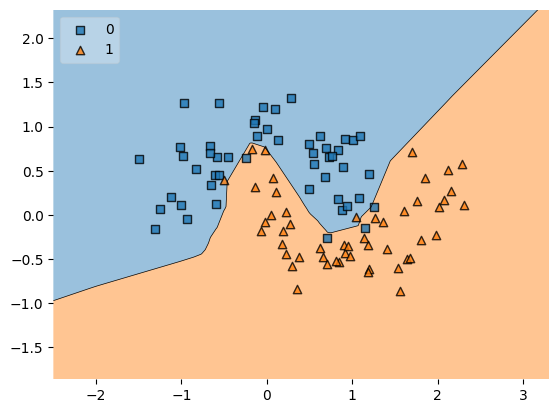

In [43]:

plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [44]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.026027570527479806)

In [45]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.027051599886519874)

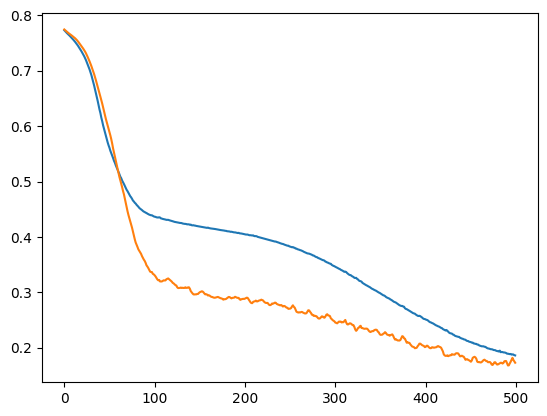

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

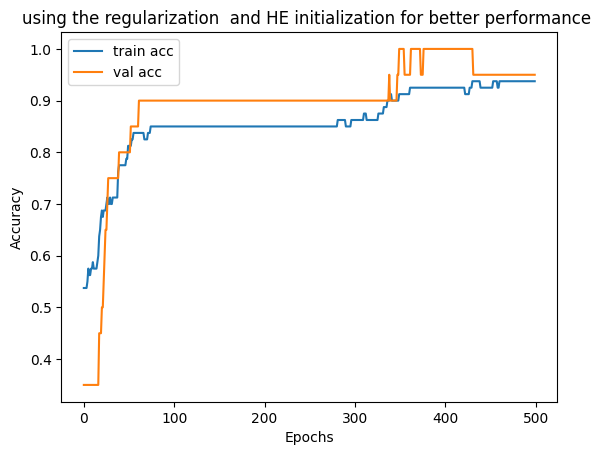

In [48]:
plt.plot(history.history['accuracy'], label="train acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("using the regularization  and HE initialization for better performance ")
plt.legend()
plt.show()